# PCA with sklearn :

In [2]:
# python -m pip install SoundFile
import glob
import os
from info import i, printb, printr, printp, print
import glob
import os
import librosa
import pdb
import csv
import json
import re
import numpy as np
import random
import librosa.display
import IPython.display as ipd
from sklearn import preprocessing
from collections import Counter
from matplotlib import pyplot as plt
from info import i, printb, printr, printp
import muda
import jams
from sklearn import svm
import librosa
import keras
import scipy.io as sio
import io
import pandas as pd
#-----------------------------------parameters for CNN -----------------------------------#
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential, Input, Model 
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D , MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
#-----------------------------------parameters for TTBOX -----------------------------------#
import timbre_descriptor as td
import numpy as np
import scipy as sc
import my_tools as mt
from collections import namedtuple
import scipy
import scipy.signal
from scipy.io import wavfile

import matplotlib
import swipep as swp             # used for sing le-F0 estimation
import warnings                 # used for warning removal
import time               # used performance benchmark
import librosa


from utils import split_samples_byHive,get_list_samples_name_benetos,  write_sample_ids_perHive, get_list_samples_name_TTBOX, get_samples_id_perSet,  split_samples_ramdom, get_list_sample_ids, get_list_samples_name_STFT, get_features_from_samples_withAUGMENTATION,  raw_feature_fromSample_withAUGMENTATION , get_list_samples_names, get_features_from_samples, write_Statelabels_from_beeNotBeelabels,raw_feature_fromSample, labels2binary , get_GT_labels_fromFiles, get_items2replicate, BalanceData_online, get_list_samples_name_MFCC, SVM_Classification_BeehiveSTATE , fit_and_evaluate,deep_model, plot_confusion_matrix, get_list_samples_name_TTBOX, Dense_Net, plot_accuracy_val_accuracy, train_and_evaluate_model,save_confusion_matrix , read_HiveState_fromSampleName

Using TensorFlow backend.


In [3]:
#----------------------------------- parameters to change-----------------------------------#
block_size=1 # blocks of 1 second
thresholds=[0, 0.5]  # minimum length for nobee intervals: 0 or 5 seconds (creates one label file per threshold value)
path= "C:\\Users\PC\python\Stage"
path_audioFiles= path +"\To Bee or not to Bee_the annotated dataset"+os.sep  # path to audio files
annotations_path=path + "To Bee or not to Bee_the annotated dataset"+os.sep # path to .lab files
path_save_audio_labels= path+ '\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
#----------------------------------- parameters to change-----------------------------------#
path_workingFolder= path+ '\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
labels2read= 'state_labels'
feature = 'MFCCs20'
path1= 'C:\\Users\PC\python\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'
path_working_MFCCs20= path1+'\\MFCCs20_matrix.mat'+os.sep
path_working_TTBox= path1+'\\TTBox_matrix.mat'+os.sep
path_save_audio_MFCCs= path1+'\\MFCCs20_matrix.mat'+os.sep 
path_working_stft= path1+'\\stft_matrix.mat'+os.sep

nbits = 16;
MAX_VAL = pow(2,(nbits-1)) * 1.0;
class_names= ['missing queen', 'active' ]
#----------------------------------parameter for CNN -----------------------------------------------------------#
# Set early stopping critiria
pat=5 # this is the number of epocks with no improvment after which the training will stop 
early_stopping= EarlyStopping(monitor='val_loss', patience=pat, verbose=1 )
n_folds=2
epochs=50
batch_size=145
#----------------------------------------------------------------------------------------------#
# if path doesn't exist then create one !!!
if not os.path.exists(path_save_audio_labels):
    os.makedirs(path_save_audio_labels)  

In [4]:
###load_audioFiles_saves_segments( path_audioFiles, path_save_audio_labels, block_size , thresholds, annotations_path, read_beeNotBee_annotations='yes', save_audioSegments='yes')  
# read only labels_BeeNotBee_th0.5
path_beeNotbee_labels = path_save_audio_labels + 'labels_BeeNotBee_th'+str(thresholds[1])+'.csv'
print("path_beeNotbee_labels: ",path_beeNotbee_labels)  
sample_ids=get_list_samples_names(path_save_audio_labels) # get sample ids from audio segments folder.
print(len(sample_ids) ) 

[2020-07-24 12:38:22 RAM80.9% 0.27GB] path_beeNotbee_labels:  C:\Users\PC\python\Stage\dataset_BeeNoBee_2_second1sec\labels_BeeNotBee_th0.5.csv
[2020-07-24 12:38:24 RAM81.1% 0.27GB] 17295


In [5]:
sample_ids_test, sample_ids_train, sample_ids_val = get_samples_id_perSet(path_workingFolder+'split_random_0.json') 
print(len(sample_ids_test), len(sample_ids_train), len(sample_ids_val))

[2020-07-24 12:38:27 RAM81.1% 0.28GB] 5188 6053 6054


In [6]:
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'b', path_save_audio_MFCCs,sample_ids_test, sample_ids_val, sample_ids_train )
#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_sample_ids(path_save_audio_MFCCs, sample_ids_test, sample_ids_val, sample_ids_train)
print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))
print("Reshape the data")
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X= np.concatenate((x_train, x_valid))
Y= np.concatenate((y_train, y_valid))
x, y, z= X.shape
X=X.reshape(x, y*z)
t, u, v= x_test.shape
x_test= x_test.reshape(t, u*v)

print(X.shape, x_test.shape, Y.shape, y_test.shape )

[2020-07-24 12:40:17 RAM82.9% 0.4GB] 6053 6054 5188 6053 6054 5188
[2020-07-24 12:40:17 RAM82.9% 0.4GB] Reshape the data
[2020-07-24 12:40:17 RAM84.1% 0.47GB] (12107, 880) (5188, 880) (12107,) (5188,)


In [7]:
import numpy as np 
labels = np.reshape(Y,(12107,1))
labels.shape

(12107, 1)

In [8]:
final_data = np.concatenate([X,labels],axis=1)
final_data.shape

(12107, 881)

In [9]:
import pandas as pd 
dataset= pd.DataFrame(final_data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,871,872,873,874,875,876,877,878,879,880
0,-465.174964,-491.247413,-484.687653,-478.066807,-468.641262,-465.311986,-470.916323,-478.049787,-472.685196,-471.326191,...,1.430296,3.462503,3.728603,1.925584,1.017321,6.089947,7.469039,5.033255,7.565714,0.0
1,-441.832067,-455.076374,-470.431226,-473.546428,-463.353275,-460.304389,-467.556181,-478.162038,-480.771114,-482.587501,...,-1.008197,-1.779943,0.258049,0.509084,3.444661,0.816622,5.282897,2.494140,-4.888364,0.0
2,-460.935519,-462.444924,-463.954399,-466.209288,-462.203854,-466.876522,-473.301728,-473.148828,-482.808906,-491.281436,...,0.017387,-0.833284,-2.592271,-5.591896,-0.907258,-0.580792,1.592811,-0.590250,-5.301553,0.0
3,-403.936254,-417.303617,-446.633039,-444.240969,-446.171154,-457.151361,-480.201471,-473.378270,-460.187417,-462.015997,...,0.341901,3.160417,2.206992,1.930131,2.636788,1.685711,0.903579,1.171174,-1.138760,0.0
4,-466.520539,-466.181739,-475.115649,-479.132173,-478.444105,-475.278185,-469.443212,-460.924036,-450.675545,-440.359668,...,6.694901,5.617172,4.554470,2.464508,0.255750,4.109979,8.722008,2.888840,3.404388,0.0


In [10]:
dataset[880].replace(0, 'Missing queen',inplace=True)
dataset[880].replace(1, 'Active',inplace=True)

In [11]:
dataset.tail()

,0,1,2,3,4,5,6,7,8,9,...,871,872,873,874,875,876,877,878,879,880
12102,-443.129934,-443.459584,-444.833813,-442.706153,-439.665426,-440.985186,-451.728767,-454.982931,-451.809862,-448.777986,...,5.013409,8.004069,6.878211,2.868822,0.102645,8.195420,2.636980,-0.132505,4.010461,Active
12103,-443.407410,-429.879123,-413.826806,-417.879480,-425.293671,-435.795702,-434.575216,-437.717189,-450.318876,-451.044202,...,0.030555,0.829900,6.627654,6.283325,7.446187,8.296623,6.996086,4.789057,7.612206,Active
12104,-462.979229,-447.174790,-435.702405,-431.343340,-415.606736,-402.927521,-425.966415,-431.533145,-433.392133,-442.250501,...,5.175668,2.004719,-0.576903,1.655418,6.084772,5.206067,3.114814,1.641210,-2.120279,Active
12105,-448.069967,-437.958152,-441.480571,-446.003717,-429.305318,-425.108989,-431.488109,-433.378990,-419.003752,-404.761284,...,2.350667,2.435609,2.609492,3.870016,10.031983,5.684069,6.325278,1.243961,4.096694,Active
12106,-442.210012,-435.384948,-431.041749,-439.145641,-447.385038,-443.982576,-444.615672,-441.011690,-433.849849,-442.156875,...,10.365660,8.504189,8.465011,15.970286,15.706707,11.387457,16.321348,18.991860,15.765152,Active


In [23]:
from sklearn.preprocessing import StandardScaler
features= [i for i in range(880)]
x = dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [24]:
x.shape

(12107, 880)

In [14]:
np.mean(x),np.std(x)

(-1.974070689617855e-18, 1.0)

In [15]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_dataset = pd.DataFrame(x,columns=feat_cols)
normalised_dataset.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature870,feature871,feature872,feature873,feature874,feature875,feature876,feature877,feature878,feature879
12102,-0.499884,-0.564365,-0.576227,-0.549040,-0.510978,-0.527470,-0.659391,-0.697506,-0.658982,-0.623165,...,0.181386,0.543680,1.257929,0.990568,0.030344,-0.636188,1.284085,-0.037664,-0.694310,0.266428
12103,-0.503194,-0.400064,-0.197084,-0.245522,-0.335305,-0.463987,-0.449674,-0.486658,-0.640777,-0.650851,...,-0.257866,-0.655115,-0.475384,0.930297,0.857906,1.122564,1.308104,0.988662,0.477428,0.972780
12104,-0.736628,-0.609313,-0.464571,-0.410124,-0.216897,-0.061910,-0.344424,-0.411138,-0.434103,-0.543421,...,1.506122,0.582716,-0.191542,-0.802742,-0.263745,0.796510,0.574624,0.074839,-0.272019,-0.935895
12105,-0.558804,-0.497807,-0.535225,-0.589355,-0.384341,-0.333256,-0.411932,-0.433680,-0.258421,-0.085428,...,-0.414510,-0.096933,-0.087437,-0.036262,0.273000,1.741853,0.688068,0.830724,-0.366597,0.283340
12106,-0.488912,-0.466675,-0.407582,-0.505511,-0.605339,-0.564137,-0.572427,-0.526890,-0.439691,-0.542277,...,2.092670,1.831344,1.378760,1.372269,3.205705,3.100929,2.041649,3.184239,3.858868,2.571685


In [17]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
pca= PCA()
principalComponents = pca.fit_transform(x)

In [18]:
#Store as dataframe and print 
df_pca= pd.DataFrame(principalComponents)
df_pca.round(2).head()

,0,1,2,3,4,5,6,7,8,9,...,870,871,872,873,874,875,876,877,878,879
0,25.45,33.60,31.36,-8.68,17.70,17.25,-8.52,11.80,6.15,-12.56,...,-0.04,-0.01,-0.03,-0.03,-0.04,-0.05,-0.06,-0.03,0.03,0.04
1,15.37,31.69,30.10,-7.73,18.05,9.41,-7.35,12.35,8.95,-10.79,...,0.01,0.02,0.00,-0.02,-0.02,-0.03,-0.01,0.00,0.04,0.01
2,22.49,35.47,26.15,-4.96,15.83,11.96,-7.72,15.11,1.50,-6.22,...,0.00,-0.00,-0.05,0.03,0.01,-0.01,-0.02,0.02,0.01,0.01
3,21.08,31.70,28.46,-1.67,16.24,11.65,-5.05,15.37,4.17,-7.49,...,-0.02,-0.03,0.00,0.01,0.01,0.01,0.02,0.02,-0.01,-0.03
4,19.33,33.21,28.48,-2.76,16.03,11.14,-6.43,18.85,6.67,-9.12,...,-0.03,0.04,0.00,-0.01,0.02,-0.02,-0.00,0.01,0.01,-0.01


In [21]:
# Weights of Principal Componenets: (Eignevectors)
df_pca_loadings= pd.DataFrame(pca.components_)
df_pca_loadings.head()



,0,1,2,3,4,5,6,7,8,9,...,870,871,872,873,874,875,876,877,878,879
0,-0.053417,-0.053570,-0.053619,-0.053607,-0.053624,-0.053618,-0.053576,-0.053604,-0.053640,-0.053680,...,0.037531,0.038041,0.038218,0.038530,0.038159,0.038206,0.038376,0.038455,0.036359,0.027142
1,0.041161,0.041367,0.041406,0.041508,0.041482,0.041367,0.041433,0.041462,0.041447,0.041386,...,-0.016477,-0.016489,-0.016847,-0.016078,-0.015686,-0.015562,-0.015646,-0.015803,-0.017819,-0.015724
2,0.025492,0.024856,0.024332,0.024354,0.024477,0.024599,0.024446,0.024337,0.024166,0.024094,...,0.004747,0.005660,0.006119,0.005429,0.005699,0.005888,0.005771,0.006676,0.006324,0.004472
3,0.008897,0.008995,0.008702,0.008588,0.008781,0.008709,0.008640,0.008516,0.008458,0.008506,...,0.035621,0.033710,0.033894,0.033514,0.033403,0.034380,0.034503,0.033928,0.033915,0.026181
4,0.011763,0.011832,0.011903,0.011948,0.011738,0.011819,0.011899,0.011742,0.011823,0.011936,...,0.010978,0.010970,0.010600,0.008100,0.009089,0.011837,0.012536,0.009852,0.008954,0.006520


In [31]:
# Compute the mean centered data 

X_mean= normalised_dataset-normalised_dataset.mean()
X_mean.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature870,feature871,feature872,feature873,feature874,feature875,feature876,feature877,feature878,feature879
0,-0.762816,-1.142521,-1.063546,-0.981342,-0.865164,-0.825059,-0.893975,-0.979196,-0.913869,-0.898629,...,-0.392424,-0.318360,0.160665,0.232937,-0.198266,-0.417127,0.784395,1.100015,0.535568,0.963662
1,-0.484404,-0.704910,-0.889223,-0.926078,-0.800527,-0.763801,-0.852895,-0.980567,-1.012597,-1.036204,...,-0.036242,-0.905021,-1.105934,-0.601896,-0.541578,0.164213,-0.467119,0.585301,-0.068952,-1.478755
2,-0.712252,-0.794057,-0.810027,-0.836378,-0.786477,-0.844198,-0.923139,-0.919346,-1.037478,-1.142415,...,-0.089727,-0.658282,-0.877217,-1.287534,-2.020254,-0.878057,-0.798767,-0.283508,-0.803291,-1.559787
3,-0.032419,-0.247920,-0.598227,-0.567804,-0.590501,-0.725230,-1.007494,-0.922148,-0.761271,-0.784889,...,-1.136001,-0.580210,0.087680,-0.133083,-0.197164,-0.029270,-0.260859,-0.445783,-0.383927,-0.743405
4,-0.778865,-0.839267,-0.946503,-0.994366,-0.984989,-0.946975,-0.875965,-0.770058,-0.645132,-0.520321,...,0.350227,0.948219,0.681243,0.431598,-0.067648,-0.599520,0.314491,1.395020,0.025020,0.147569


In [34]:
# Compute PC1 for the row 1
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :])

15.368529828562146

In [35]:
print(pca.explained_variance_ratio_.round(2)[:10])

[2020-07-24 12:56:05 RAM88.1% 1.21GB] [0.25 0.16 0.07 0.04 0.03 0.02 0.01 0.01 0.01 0.01]


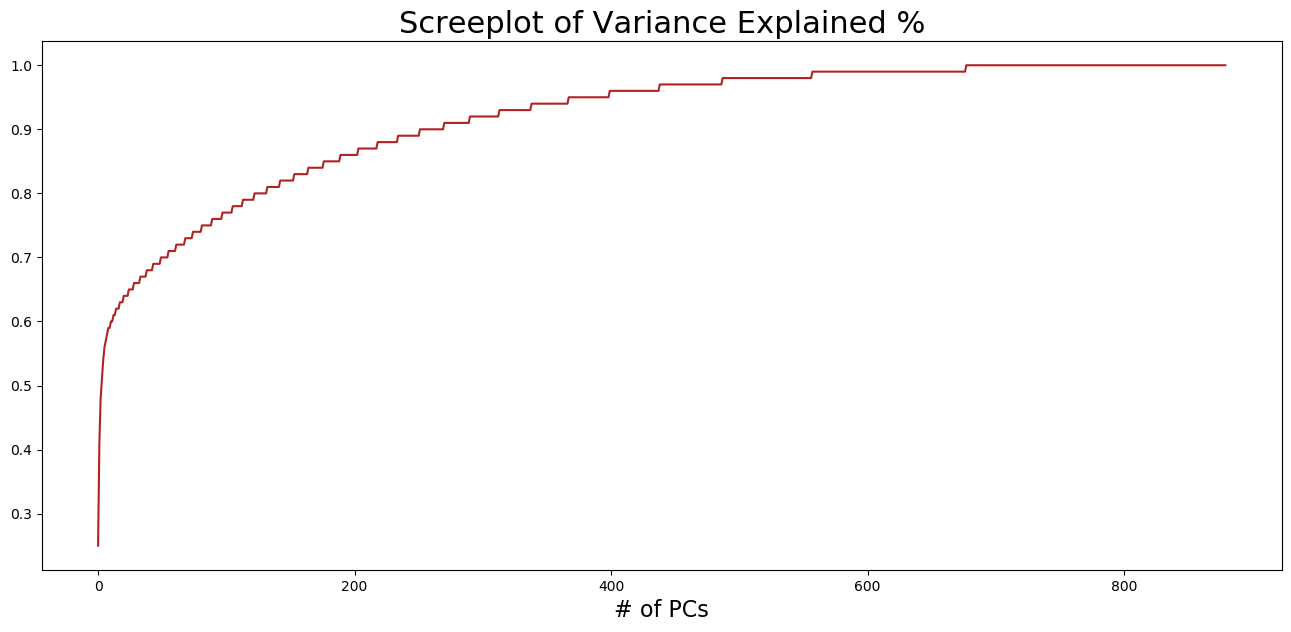

In [37]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [38]:
# Plot the clustering tendency 
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

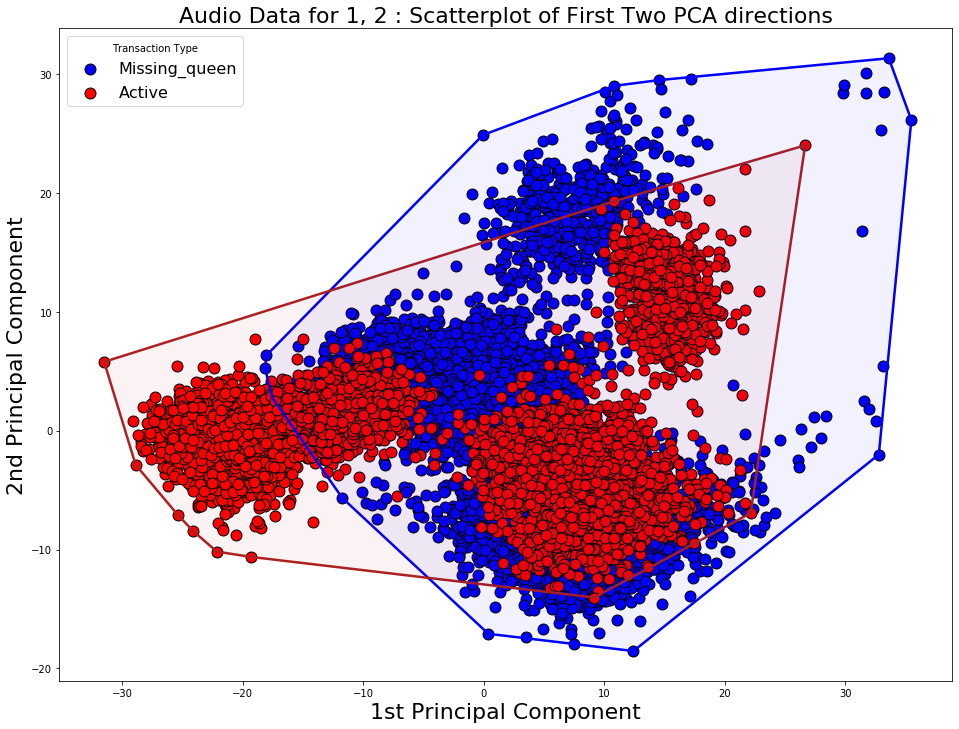

In [41]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
rows_0 = Y==0;
rows_1 = Y==1; 


# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Missing_queen')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='Active')

# Encircle the boundaries
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)

# Shading
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)

# Labels
ax.set_title("Audio Data for 1, 2 : Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Transaction Type', fontsize=16)
plt.show();

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [146]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_Df['y'] = Y

In [148]:
principal_Df.head()

,principal component 1,principal component 2,y
0,25.446007,33.601041,0
1,15.368530,31.691025,0
2,22.486406,35.470329,0
3,21.076390,31.702082,0
4,19.332676,33.210341,0


In [142]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

[2020-07-13 17:18:23 RAM61.2% 0.72GB] Explained variation per principal component: [0.25344826 0.15773794]


From the above output, we can observe that the principal component 1 holds 25.3% of the information while the principal component 2 holds only 15.7% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 59% information was lost.